In [2]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as np
import itertools
import datetime
import tqdm
import sys
import os
import matplotlib.pyplot as plt


def flatten_list(list_array):
    return list(itertools.chain(*list_array))

sys.path.insert(0,"../")

from utils.plot_utils import *


In [3]:
from utils.data_utils import load_movement_df, ward2size

#from utils.plot_utils import *

path_to_data = os.path.join('..', '..', 'data')

# load scenarios for synthetic inferences
movement_df, ward2cluster = load_movement_df(path_to_data, True) # movement data
movement_df.index.name    = "date"
movement_df               = movement_df.reset_index()
ward2size                 = ward2size(movement_df)
ward2size                 = {r.ward_id: r.num_patients for idx_r, r in ward2size.iterrows()}

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_21650/202167001.py:8: DtypeWarning: Columns (0,1,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  movement_df, ward2cluster = load_movement_df(path_to_data, True) # movement data


In [4]:
df2     = movement_df.sort_values(['mrn_id','date'])
df2     = df2.reset_index()
cur_day = 0

for i in range(0, df2.shape[0]) :
    first = df2.iloc[i].first_day
    if(first == True) :
        cur_day = 0
    cur_day += 1
    df2.at[i,'day'] = cur_day


In [5]:
specimens_inference  = ["ESCHERICHIA COLI", "KLEBSIELLA PNEUMONIAE", "PSEUDOMONAS AERUGINOSA", "METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS",
                            "STAPHYLOCOCCUS EPIDERMIDIS", "CANDIDA ALBICANS", "METHICILLIN-RESISTANT STAPHYLOCOCCUS AUREUS", "ENTEROCOCCUS FAECALIS"]

test_df               = df2[df2.test==True]
testSinceAdmission_df = (test_df.day.value_counts())



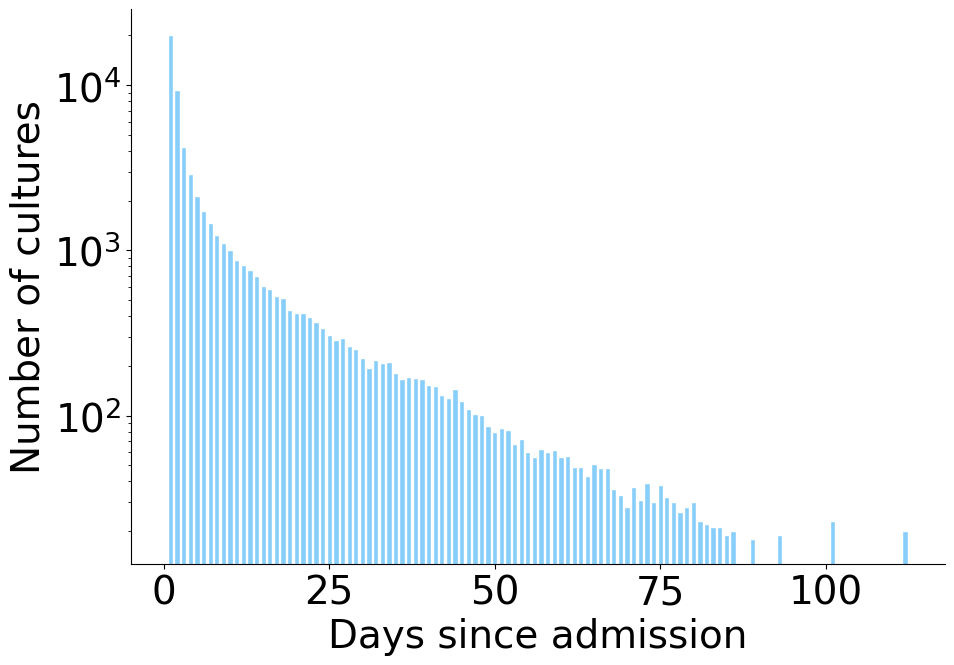

In [52]:
fig, ax = plt.subplots(figsize=(10.5, 7.2))

ax.bar(x=testSinceAdmission_df.keys()[np.arange(90)], height=testSinceAdmission_df.values[np.arange(90)], edgecolor="w", facecolor="lightskyblue")
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("Days since admission")
ax.set_ylabel("Number of cultures")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



In [29]:
def specimen2title(specimen):
    sp_title = specimen
    if specimen == "METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS":
        sp_title = "MSSA"
    elif specimen == "METHICILLIN-RESISTANT STAPHYLOCOCCUS AUREUS":
        sp_title = "MRSA"
    elif specimen == "STAPHYLOCOCCUS EPIDERMIDIS":
        sp_title = "S. Epidermis"
    elif sp_title == "ESCHERICHIA COLI":
        sp_title = "E. Coli"
    elif sp_title == "KLEBSIELLA PNEUMONIAE":
        sp_title = "K. Pneumoniae"
    elif sp_title == "PSEUDOMONAS AERUGINOSA":
        sp_title = "P. Aeruginosa"
    elif sp_title == "CANDIDA ALBICANS":
        sp_title = "C. Albicans"
    elif sp_title == "ENTEROCOCCUS FAECALIS":
        sp_title = "E. Faecalis"
    return sp_title

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_21650/3439386526.py:33: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


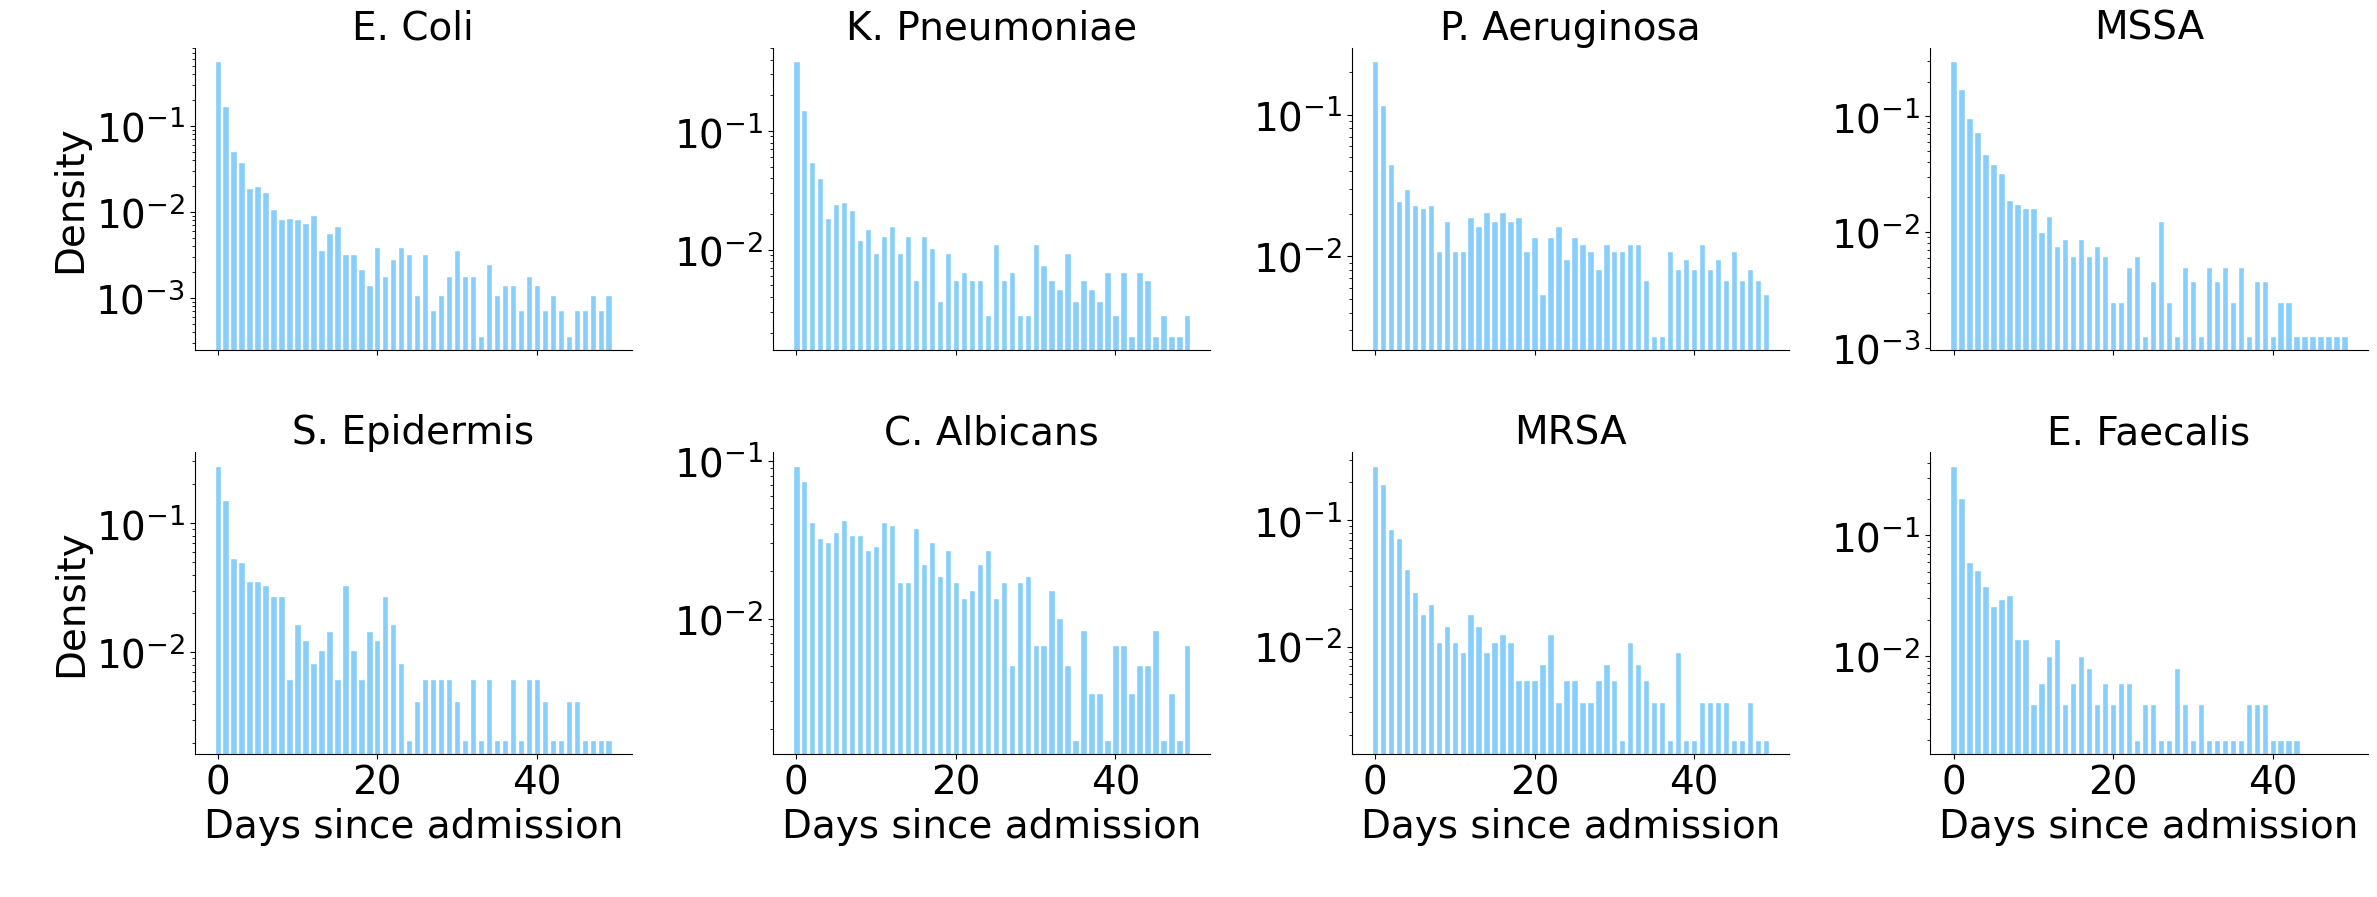

In [50]:
import seaborn as sns

fig     = plt.figure(constrained_layout=True, figsize=(24, 9.2))
subfigs = fig.subfigures(1, 1, hspace=0.07, wspace=0.01, height_ratios=[1])

axes    = subfigs.subplots(2, 4, sharex=True).flatten()

colors = sns.color_palette("pastel") #"ch:start=.2,rot=-1.1", n_colors=len(sites))


for idx_amro, amro in enumerate(specimens_inference):

    amro_df        = test_df[test_df.organism_name==amro]
    amro_counts_df = amro_df.day.value_counts()
    amro_counts_df = amro_counts_df.sort_index().to_frame()
    amro_counts_df.index.name = "days_since_admission"; amro_counts_df = amro_counts_df.rename(columns={"day": "count"}).reset_index().iloc[:50]

    amro_counts_df["count_norm"] = amro_counts_df["count"] / amro_counts_df["count"].sum()

    axes[idx_amro].bar(x=amro_counts_df.index.values, height=amro_counts_df["count_norm"], edgecolor="w", facecolor="lightskyblue")
    axes[idx_amro].set_yscale("log")
    axes[idx_amro].set_title(specimen2title(amro))

    axes[idx_amro].spines['right'].set_visible(False)
    axes[idx_amro].spines['top'].set_visible(False)

    if idx_amro>3:
        axes[idx_amro].set_xlabel("Days since admission")

axes[-4].set_ylabel(r"Density")
axes[0].set_ylabel(r"Density")

plt.tight_layout()